# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution
def dbinom(x, size, prob = 0.5):
    '''Calculates the point estimate of the binomial distribution'''

    return binom.pmf(k = x, n = size, p = prob, loc = 0)


def pbinom(q, size, prob = 0.5):
    '''Calculates the cumulative of the binomial distribution'''

    return binom.cdf(k = q, n = size, p = prob, loc = 0)


def qbinom(p, size, prob = 0.5):
    '''Calculates the quantile function from the binomial distribution'''

    return binom.ppf(q = p, n = size, p = prob, loc = 0)


def rbinom(n, size, prob = 0.5):
    '''Generates random variables from the binomial distribution'''
    
    return binom.rvs(n = size, p = prob, size = n)

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


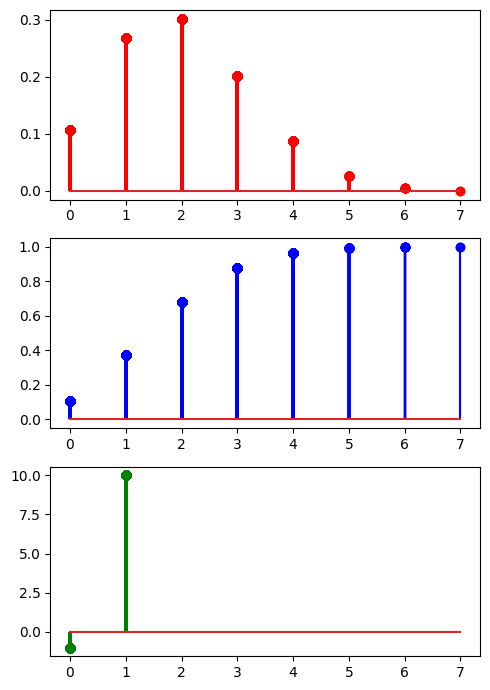

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

In [4]:
from scipy.stats import norm, uniform

class ContinuousDistribution:
    '''Wrapper class to hold common statistical methods for SciPy stats continuous distributions.'''

    def __init__(self, distribution: str='normal', loc: float=0.0, scale: float=1.0) -> None:
        '''Class instance initilization, sets distribution type, loc and scale.
        distribution must be one of 'normal' or 'uniform.'''

        # Set loc and scale
        self.loc=loc
        self.scale=scale

        # Choose distribution type
        if distribution == 'normal':
            self.distribution=norm

        elif distribution == 'uniform':
            self.distribution=uniform

        else:
            print("Distribution must 'normal' or 'uniform'")

    def probability_density(self, x: list) -> np.array:
        '''Takes list-like of input values and calculates probability density at each.
        Returns result as 1D numpy array.'''

        return self.distribution.pdf(x, loc=self.loc, scale=self.scale)
    
    def cumulative_density(self, x: list) -> np.array:
        '''Takes list-like of input values and calculates cumulative probability 
        density at each. Returns result as 1D numpy array.'''

        return self.distribution.cdf(x, loc=self.loc, scale=self.scale)
    
    def percentiles(self, x: list) -> np.array:
        '''Takes list-like of input values and calculates percentile for each.
        Returns result as 1D numpy array.'''

        return self.distribution.ppf(x, loc=self.loc, scale=self.scale)

### Normal & uniform distributions

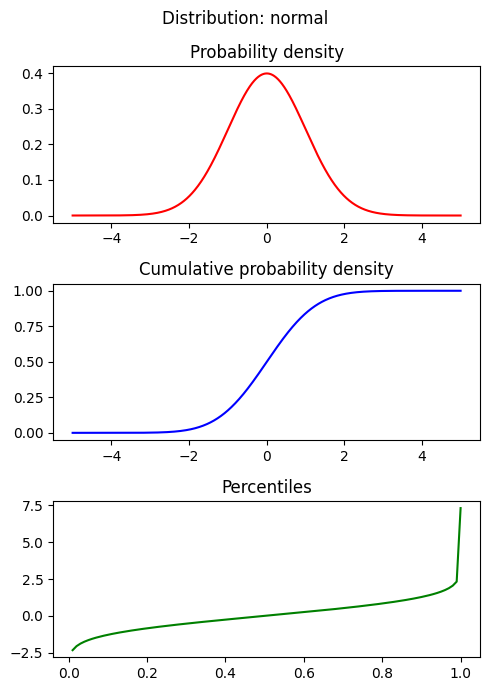

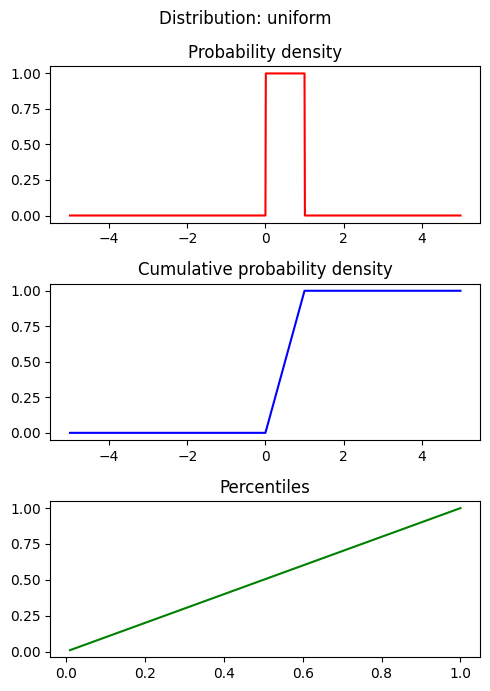

In [5]:
# Loop on the distribution types
for distribution_type in ['normal', 'uniform']:

    # Instantiate class instance for this distribution type
    distribution=ContinuousDistribution(distribution_type)

    # Generate input data
    data=np.arange(-5, 5, 0.01)

    # Set-up plots
    fig, axis=plt.subplots(3, 1, figsize=(5, 7))

    # Set main title
    fig.suptitle(f'Distribution: {distribution_type}')

    # Draw each individual plot
    axis[0].set_title('Probability density')
    axis[0].plot(data, distribution.probability_density(data), 'r-')

    axis[1].set_title('Cumulative probability density')
    axis[1].plot(data, distribution.cumulative_density(data), 'b-')

    axis[2].set_title('Percentiles')
    axis[2].plot(data, distribution.percentiles(data), 'g-')

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()